In [119]:
import pymc
import theano
import copy
import importlib
import numpy as np
import pandas as pn
import math
import matplotlib.pyplot as plt
%matplotlib inline


import sys

sys.path.append("../../gempy")
import gempy as gp
from gempy import Topology as tp

sys.path.append("../../pynoddy")
import pynoddy
import pynoddy.history
import pynoddy.output
import pynoddy.events
import pynoddy.experiment

In [172]:
geo_data = gp.create_data([337000, 400000, 6640000, 6710000, -18000, 1000],
                          resolution = [20,25,20])

geo_data.import_data_csv("input_data/Paper_GU2F_sc_faults_topo_Points.csv", 
                         "input_data/Paper_GU2F_sc_faults_topo_Foliations.csv")

geo_data.calculate_gradient()

In [158]:
np.unique(geo_data.interfaces["formation"])

array(['Abrolhos_Transfer', 'Cadda', 'Cattamarra', 'Coomallo',
       'Cretaceous', 'Darling', 'Eneabba', 'Eneabba_South', 'Hypo_fault_E',
       'Hypo_fault_W', 'Lesueur', 'Permian', 'Urella_North',
       'Urella_South', 'Woodada_Kockatea', 'Yarragadee'], dtype=object)

In [173]:
geo_data.interfaces = geo_data.interfaces[geo_data.interfaces["formation"] != "Cadda"]
geo_data.foliations = geo_data.foliations[geo_data.foliations["formation"] != "Cadda"]
geo_data.interfaces = geo_data.interfaces[geo_data.interfaces["formation"] != "Woodada_Kockatea"]
geo_data.foliations = geo_data.foliations[geo_data.foliations["formation"] != "Woodada_Kockatea"]
geo_data.interfaces = geo_data.interfaces[geo_data.interfaces["formation"] != "Cattamarra"]
geo_data.foliations = geo_data.foliations[geo_data.foliations["formation"] != "Cattamarra"]

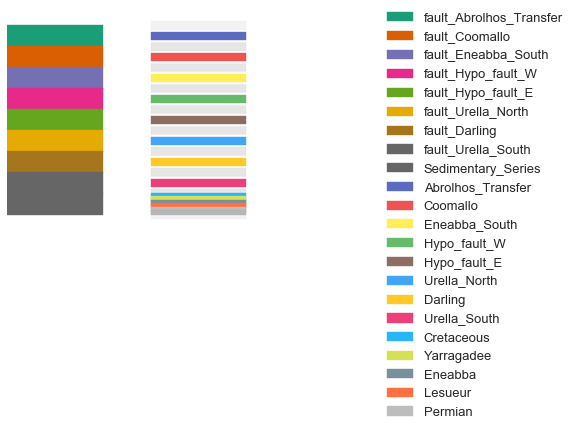

In [174]:
gp.set_series(geo_data, 
              {# "fault_Abrolhos_Transfer": ["Abrolhos_Transfer"],
               "fault_Coomallo": ["Coomallo"],
               "fault_Eneabba_South": ["Eneabba_South"],
               "fault_Hypo_fault_W": ["Hypo_fault_W"],
               "fault_Hypo_fault_E": ["Hypo_fault_E"],
               "fault_Urella_North": ["Urella_North"],
               "fault_Urella_South": ["Urella_South"],
               "fault_Darling": ["Darling"],
               "Sedimentary_Series": ['Cretaceous', 
                                  'Yarragadee', 
                                  #'Cadda', 
                                  #'Cattamarra', 
                                  'Eneabba',
                                  'Lesueur',
                                  #'Woodada_Kockatea', 
                                  'Permian']
               # "fault_Eneabba_North": ["Eneabba_North"]
              }, order_series = ["fault_Abrolhos_Transfer",
                                  "fault_Coomallo",
                                  "fault_Eneabba_South",
                                  "fault_Hypo_fault_W",
                                  "fault_Hypo_fault_E",
                                  "fault_Urella_North",
                                  "fault_Darling",
                                  "fault_Urella_South",
                                  "Sedimentary_Series"],
              order_formations= ["Abrolhos_Transfer",
                                 "Coomallo",
                                 "Eneabba_South",
                                 "Hypo_fault_W",
                                 "Hypo_fault_E",
                                 "Urella_North",
                                 "Urella_South", 
                                 "Darling",
                                   
                                      'Cretaceous', 
                                      'Yarragadee', 
                                      #'Cadda', 
                                      #'Cattamarra', 
                                      'Eneabba',
                                      'Lesueur',
                                      #'Woodada_Kockatea', 
                                      'Permian'])

geo_data.set_formation_number()
geo_data.order_table()

In [175]:
geo_data = gp.select_series(geo_data, ["fault_Hypo_fault_W",  "fault_Hypo_fault_E", "Sedimentary_Series"]) # "fault_Hypo_fault_E",

In [162]:
geo_data.get_formations()

array(['Hypo_fault_W', 'Cretaceous', 'Yarragadee', 'Eneabba', 'Lesueur',
       'Permian'], dtype=object)

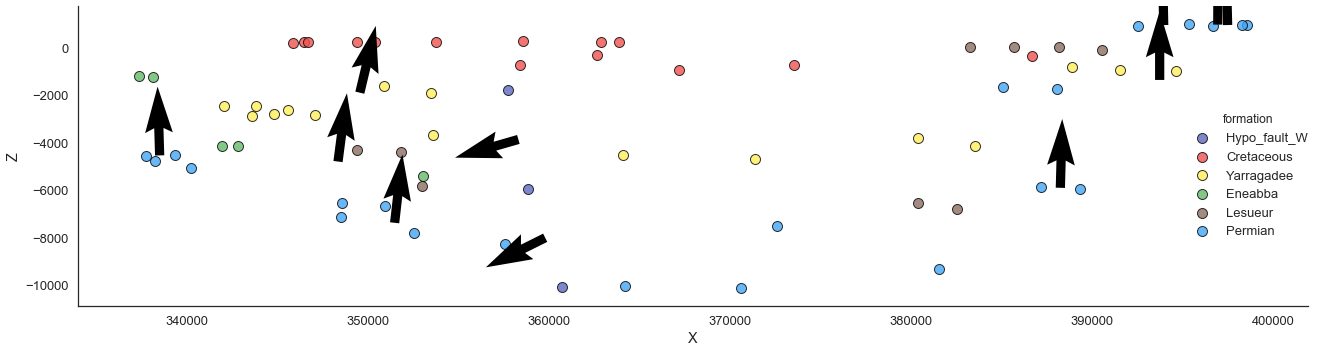

In [163]:
%matplotlib inline
gp.plot_data(geo_data)
plt.tight_layout()
#plt.savefig("input_data.pdf")

In [187]:
gp.plot_data_3D(geo_data)

In [176]:
#geo_data = gp.select_series(geo_data,  ["fault_Hypo_fault_E", "Sedimentary_Series"]) # "fault_Coomallo", "fault_Hypo_fault_W", "fault_Hypo_fault_E", "fault_Urella_South",
interp_data = gp.InterpolatorInput(geo_data, dtype="float64", verbose=["potential_field_iter"])

Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64


In [177]:
interp_data.interpolator.tg.n_formation.get_value()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [178]:
lith_block, fault_block = gp.compute_model(interp_data)

potential_field_iter __str__ = [ 950.17963331  949.95482326  949.76845946]
potential_field_iter __str__ = [ 886.38251351  886.19417039  872.25009439]
potential_field_iter __str__ = [ 850.34134417  850.30770931  850.30404112  850.29693356  850.29256856
  850.29227222  850.17251286]


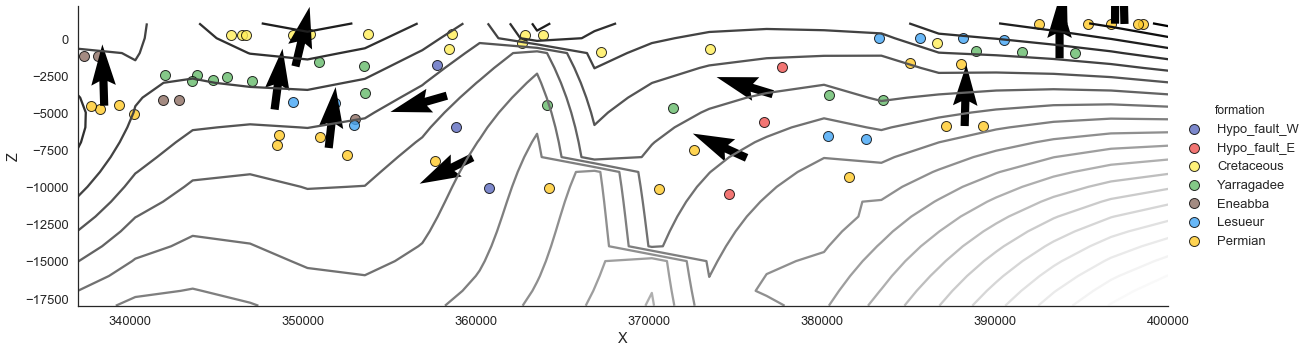

In [179]:
gp.plot_potential_field(geo_data, lith_block[1], 0)

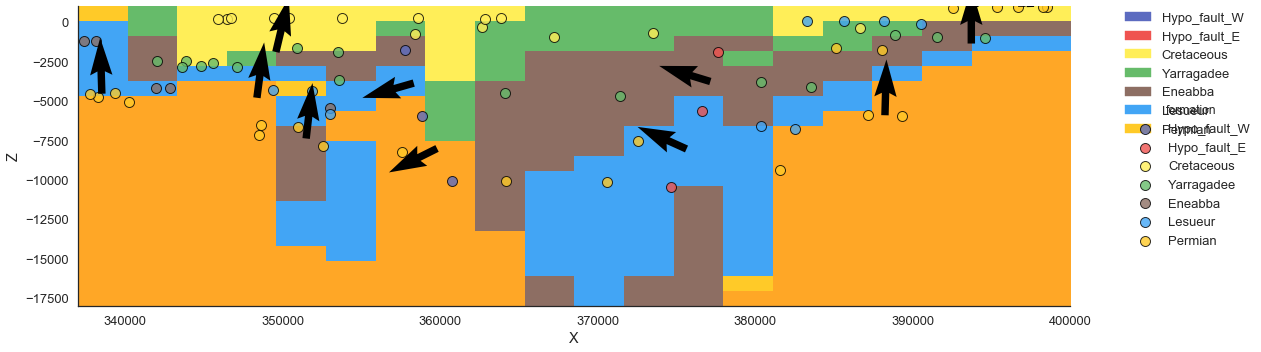

In [181]:
gp.plot_section(geo_data, lith_block[0], 5, direction="y", plot_data=True)

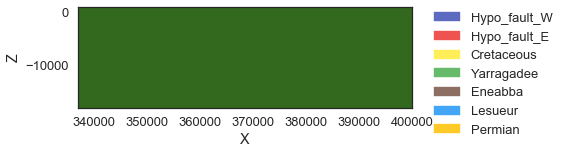

In [185]:
gp.plot_section(geo_data, fault_block[1], 5, direction="y")

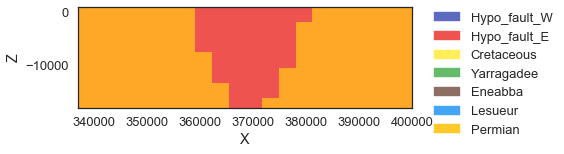

In [186]:
gp.plot_section(geo_data, fault_block[2], 5, direction="y")

In [13]:
gp.plot_data_3D(geo_data)

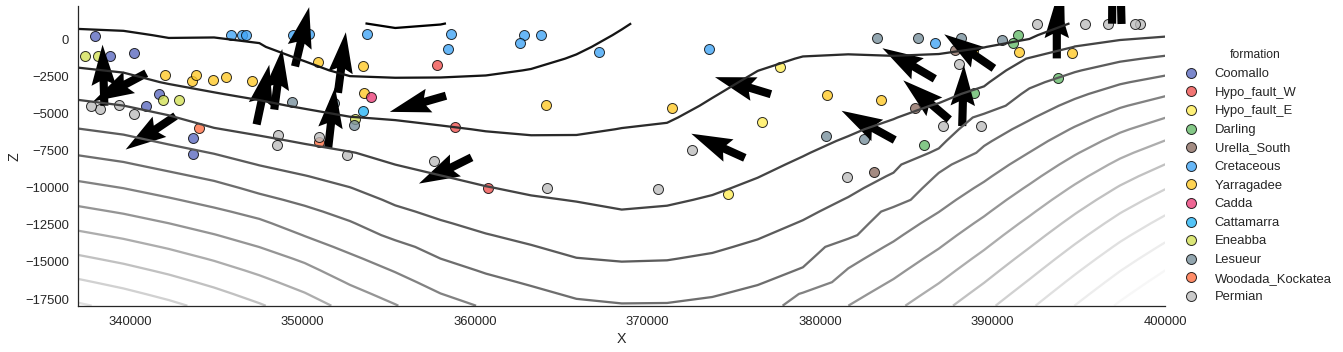

In [90]:
gp.plot_potential_field(geo_data, lith_block[1], 15)

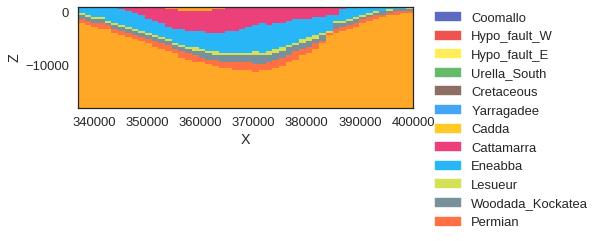

In [28]:
gp.plot_section(geo_data, lith_block[0], 25)

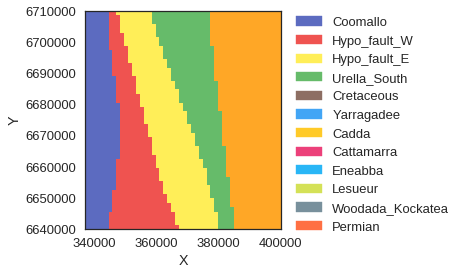

In [29]:
gp.plot_section(geo_data, fault_block[0], 20, direction="z")

In [22]:
gp.plot_data_3D(geo_data)

In [79]:
gp.get_surfaces??

In [188]:
ver, sim = gp.get_surfaces(interp_data, lith_block[1], [fault_block[1], fault_block[3]], original_scale=False)

In [ ]:
%debug

> /home/alexanderschaaf/anaconda3/lib/python3.6/site-packages/skimage/measure/_marching_cubes_lewiner.py(218)marching_cubes_lewiner()
    216 
    217     if not len(vertices):
--> 218         raise RuntimeError('No surface found at the given iso value.')
    219 
    220     # Output in z-y-x order, as is common in skimage

ipdb> up
> /home/alexanderschaaf/git/gempy/gempy/GemPy_f.py(575)get_surface()
    573             spacing=((interp_data.geo_data_res.extent[1] - interp_data.geo_data_res.extent[0]) / interp_data.geo_data_res.resolution[0],
    574                      (interp_data.geo_data_res.extent[3] - interp_data.geo_data_res.extent[2]) / interp_data.geo_data_res.resolution[1],
--> 575                      (interp_data.geo_data_res.extent[5] - interp_data.geo_data_res.extent[4]) / interp_data.geo_data_res.resolution[2]))
    576 
    577 

ipdb> (interp_data.geo_data_res.extent[5] - interp_data.geo_data_res.extent[4]) / interp_data.geo_data_res.resolution[2]
0.00286922379945635

In [80]:
interp_data.potential_at_interfaces

array([[ 94.03024292,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,  88.6519928 ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,  84.14245605,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,  79.57372284,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         74.30317688,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.    

In [88]:
interp_data.geo_data_res.interfaces

,X,Y,Z,formation,series,order_series,isFault,formation number,annotations
0,0.316827,0.318339,0.477332,Coomallo,fault_Coomallo,2,True,1,"${\bf{x}}_{\alpha \,{\bf{1}},0}$"
1,0.280539,0.309687,0.527072,Coomallo,fault_Coomallo,2,True,1,"${\bf{x}}_{\alpha \,{\bf{1}},1}$"
2,0.290872,0.585367,0.528518,Coomallo,fault_Coomallo,2,True,1,"${\bf{x}}_{\alpha \,{\bf{1}},2}$"
3,0.301642,0.586637,0.507784,Coomallo,fault_Coomallo,2,True,1,"${\bf{x}}_{\alpha \,{\bf{1}},3}$"
4,0.316531,0.588392,0.485136,Coomallo,fault_Coomallo,2,True,1,"${\bf{x}}_{\alpha \,{\bf{1}},4}$"
5,0.296091,0.313395,0.501314,Coomallo,fault_Coomallo,2,True,1,"${\bf{x}}_{\alpha \,{\bf{1}},5}$"
6,0.274037,0.706061,0.537081,Coomallo,fault_Coomallo,2,True,1,"${\bf{x}}_{\alpha \,{\bf{1}},6}$"
7,0.445659,0.356502,0.459864,Hypo_fault_W,fault_Hypo_fault_W,4,True,2,"${\bf{x}}_{\alpha \,{\bf{2}},0}$"
8,0.4233,0.349489,0.522522,Hypo_fault_W,fault_Hypo_fault_W,4,True,2,"${\bf{x}}_{\alpha \,{\bf{2}},1}$"
9,0.431563,0.352081,0.490938,Hypo_fault_W,fault_Hypo_fault_W,4,True,2,"${\bf{x}}_{\alpha \,{\bf{2}},2}$"


In [190]:
gp.plot_surfaces_3D(interp_data.geo_data_res, ver, sim, alpha=1)
